# Working With Data - Continuous Assessment 1 - Class Group: TU059 / TU060

## Ciaran Finnegan - Student No. d21124026

### November 2021

### What insights can various global socioecononmic and political datasets provide us in terms of explaining what makes a nation 'happy?


#### This project takes the World Happiness Report from Kaggle as the core dataset. 

A number of seperate global socioeconomic and political dataset are combined with this 'happiness' dataset to look for deeper insight of what actually may contribute to making a given country a 'happy' place.

## 

#### The CA follows a three-part structure.

Works begins with initial data loads, and additional tasks to create our combined dataset of 'happiness' attributes for individuals countries.

Exploration of the individual and merged datasets takes place to provide an overview of data strcuture and content.

The project ends with a deeper dive into whether we can isolate more easily understood factors that impact on whther a country can be deemed 'happy' or not.


### 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Seaborn" data-toc-modified-id="Seaborn-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Seaborn</a></span><ul class="toc-item"><li><span><a href="#Notebook-Modes" data-toc-modified-id="Notebook-Modes-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebook Modes</a></span></li><li><span><a href="#Dataset-Distribution" data-toc-modified-id="Dataset-Distribution-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Dataset Distribution</a></span></li><li><span><a href="#Categorical-Data" data-toc-modified-id="Categorical-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Categorical Data</a></span></li><li><span><a href="#Time-Series-Data" data-toc-modified-id="Time-Series-Data-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Time-Series Data</a></span></li></ul></li><li><span><a href="#Pandas-Plotting" data-toc-modified-id="Pandas-Plotting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Pandas Plotting</a></span></li><li><span><a href="#Plotly" data-toc-modified-id="Plotly-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Plotly</a></span><ul class="toc-item"><li><span><a href="#Transfer-Matplotlib-Figure-to-Plotly" data-toc-modified-id="Transfer-Matplotlib-Figure-to-Plotly-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Transfer Matplotlib Figure to Plotly</a></span></li></ul></li><li><span><a href="#Animation" data-toc-modified-id="Animation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Animation</a></span></li><li><span><a href="#Jupyter-Magic" data-toc-modified-id="Jupyter-Magic-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Jupyter Magic</a></span></li></ul></div>

# Part 1

## Import the piece/s of data and perform any cleaning and merging to produce a final dataframe.

Note: It is assumed that the matplotlib library has been installed on the user's machine before it is available for import.

```bash
> pip install matplotlib
```

In [1]:
# Load libraries...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

Set up some additional libraries for graphical presentations

#### Seaborn Library

In [3]:
# import and set Seaborn style
# notice how this will update Matplotlib style too
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("talk", font_scale=1)

### 

Start with a 2019 Kaggle File that contains a happiness score (range 1 - 10) for 155 countries around the world.

In [4]:
# Read file, located in same directory as the notebook, for World Happiness Index data
df_WorldHappinessIndex = pd.read_csv('World_Happiness_Index_In_2019.csv')


In [5]:
# Display basic file data for the initial Kaggle 'Gloabl Happiness' datatset
df_WorldHappinessIndex

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


#### 

To begin the process of building an augmented database on global nations 'happiness', the new dataset to load contains a comparison of GDP Per Capita and a Political Stability Index for individual countries over approximately the last 20 years.

The source of the dataset is the Our World in Data website - https://ourworldindata.org/

Our Kaggle dataset is only concerned with the year 2019 so we will be manipulating this GDP/Stability file to focus on just those entries.

In [6]:
# Read file, located in same directory as this notebook, for GDP/Political Stability data
df_GDPStateFragility = pd.read_csv('gdp-per-capita-vs-state-fragility.csv')

In [7]:
# Display basic dataframe information for GDP/Political Stability data
df_GDPStateFragility

,Entity,Code,Year,"GDP per capita, PPP (constant 2017 international $)",Fragile States Index - ffp_fsi,"Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,1189.784668,NaN,22600774.0,NaN
2,Afghanistan,AFG,2003,1235.810063,NaN,23680871.0,NaN
3,Afghanistan,AFG,2004,1200.278013,99.0,24726689.0,NaN
4,Afghanistan,AFG,2005,1286.793659,99.8,25654274.0,NaN
...,...,...,...,...,...,...,...
57114,Zimbabwe,ZWE,1987,NaN,NaN,9527202.0,NaN
57115,Zimbabwe,ZWE,1988,NaN,NaN,9849129.0,NaN
57116,Zimbabwe,ZWE,1989,NaN,NaN,10153852.0,NaN
57117,Zimbabwe,ZWE,2021,NaN,NaN,15092171.0,NaN


#### 

The next file to load is the 'Human Freedom Index' - https://www.openintro.org/data/index.php?data=hfi

This is a dataset sourced from the OpenIntro portal. Using the website's own description..."The Human Freedom Index is a report that attempts to summarize the idea of "freedom" through a bunch of different variables for many countries around the globe."

In [8]:
# Read file, located in same directory as this notebook, for Human Freedom Index data
df_HumanFreedomIndex = pd.read_csv('humanfreedomind.csv')

In [9]:
# Display basic dataframe information for Human Freedom Index data
df_HumanFreedomIndex

,year,ISO_code,countries,region,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,...,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank,hf_score,hf_rank,hf_quartile
0,2016,ALB,Albania,Eastern Europe,6.661503,4.547244,4.666508,5.291752,8.920429,10.0,...,4.050196,7.324582,7.074366,6.705863,6.906901,7.54,34.0,7.568140,48.0,2.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,NaN,NaN,3.819566,9.456254,10.0,...,3.765515,8.523503,7.029528,5.676956,5.268992,4.99,159.0,5.135886,155.0,4.0
2,2016,AGO,Angola,Sub-Saharan Africa,NaN,NaN,NaN,3.451814,8.060260,5.0,...,1.945540,8.096776,6.782923,4.930271,5.518500,5.17,155.0,5.640662,142.0,4.0
3,2016,ARG,Argentina,Latin America & the Caribbean,7.098483,5.791960,4.343930,5.744791,7.622974,10.0,...,3.260044,5.253411,6.508295,5.535831,5.369019,4.84,160.0,6.469848,107.0,3.0
4,2016,ARM,Armenia,Caucasus & Central Asia,NaN,NaN,NaN,5.003205,8.808750,10.0,...,4.575152,9.319612,6.491481,6.797530,7.378069,7.57,29.0,7.241402,57.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,2008,VEN,Venezuela,Latin America & the Caribbean,3.000000,3.781688,2.369239,3.100000,0.000000,10.0,...,2.784695,4.578318,0.315142,2.864160,4.666936,4.22,140.0,5.257879,136.0,4.0
1454,2008,VNM,Vietnam,South Asia,6.666667,4.349101,5.694847,5.600000,9.496239,5.0,...,3.626593,7.306074,0.000000,4.574683,6.307577,6.19,103.0,6.420206,106.0,3.0
1455,2008,YEM,"Yemen, Rep.",Middle East & North Africa,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,2008,ZMB,Zambia,Sub-Saharan Africa,4.800000,4.578003,3.688652,4.400000,7.878084,10.0,...,4.585391,5.124436,8.520369,6.681524,6.722175,7.15,57.0,6.647724,95.0,3.0


The Human Freedom Index contains variables which we will correlate later against the Happiness Index, but it also contains the useful country attributes for ISO code and World Region that will be useful in later analysis.

#### 

#### 

The next dataset to load is the 'CIA Factbook Details on Countries'.

This is a collection of country-level statistics from the US Central Intelligence Agency (CIA). It contains a series of attributes that we will compare against the 'happiness index' to determine if we can find any meaningful and interesting correlations.


In [10]:
# Read file, located in same directory as this notebook, for CIA Factbook data
df_CIAFactbook = pd.read_csv('cia_factbook.csv')

In [11]:
# Display basic file data for the initial Kaggle 'Gloabl Happiness' datatset
df_CIAFactbook

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80
...,...,...,...,...,...,...,...,...,...,...,...
254,Bouvet Island,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
255,Palmyra Atoll,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Akrotiri,123.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
257,European Union,NaN,NaN,NaN,4.33,NaN,80.02,NaN,NaN,5.114348e+08,NaN


# 

Part 2 of this report will delve into all the datasets in more detail but for now let's generate some basic graphs of the data loaded to confirm some basic details.


First: A quick look at the top and bottom of the Kaggle dataset 'happiness' index..

<AxesSubplot:ylabel='Country or region'>

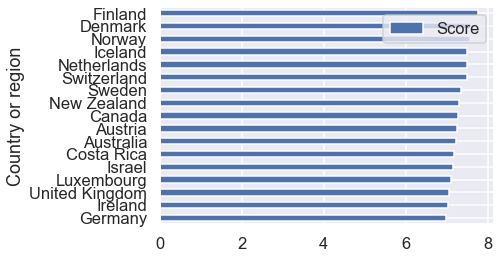

In [12]:
# Vertical Bar Chart of top nations in happiness index
# The 'Top 17' cut off allows 'Ireland' to be included in graph
top_17 = df_WorldHappinessIndex[df_WorldHappinessIndex["Overall rank"] < 18] 

# Plot horizontal bar chart with Matplotlib
top_17.sort_values("Score",ascending=True).plot.barh(x="Country or region", y="Score")

<AxesSubplot:ylabel='Country or region'>

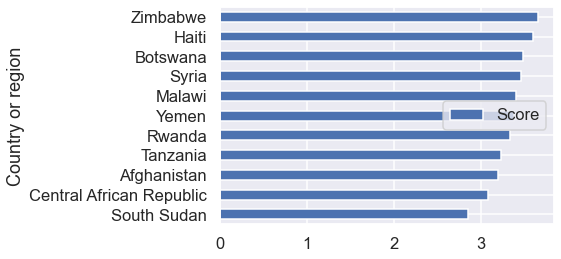

In [13]:
# Vertical Bar Chart of bottom nations in happiness index
# The bottom 10 are sufficient for this graph
bottom_10 = df_WorldHappinessIndex[df_WorldHappinessIndex["Overall rank"] > 145] 

# Plot horizontal bar chart with Matplotlib
bottom_10.sort_values("Score",ascending=True).plot.barh(x="Country or region", y="Score")

#### 

Second: A brief overview of the GDP/State Fragility data

In [14]:
# Some code here...

#### 

Third: A quick look at the structure of the 'Human Freedom' index..

In [15]:
# Some code here..
# sns.pairplot(df_HumanFreedomIndex, hue='region')

####  

Fourth: A quick look at the structure of the 'CIA Country Factbook' index..

####  

## Clean Up Datasets
### There are some missing data attributes and issus with some of the data content which need to be addressed before we can create a merged custom 'happiness' dataset with which to generate the interesting/insightful visualisations.

Kaggle Happiness: The assumption is the our initial dataset, which is the Kaggle happiness index, is clean and complete but some basic checks are performed here.  

To improve the later vizualisations columns will be remaned in each dataframe to emhance understanding/presentation.

In [16]:
df_WorldHappinessIndex.rename(columns={'Overall rank':'Happiness Rank', 'Country or region':'Country', 'Score':'Happiness Score', 
                        'GDP per capita':'Economy','Social support':'Social Support', 
                        'Healthy life expectancy':'Life Expectancy', 'Freedom to make life choices':'Freedom',                        
                        'Perceptions of corruption':'Trust in Gov'},inplace=True)

In [17]:
# Checking for null values in Kaggle Happiness dataset
[print('Any Null Values in the Kaggle 2019 Happiness Dataframe?','\n' ,df_WorldHappinessIndex.isnull().any())]

Any Null Values in the Kaggle 2019 Happiness Dataframe? 
 Happiness Rank     False
Country            False
Happiness Score    False
Economy            False
Social Support     False
Life Expectancy    False
Freedom            False
Generosity         False
Trust in Gov       False
dtype: bool


[None]

In [18]:
## Although it is an unlikely scenario - a quick check is run to see if any duplicate entires exist
[print('Numbers of duplicated rows in the Kaggle 2019 Happiness Dataframe?','\n' ,df_WorldHappinessIndex.duplicated().sum())]

Numbers of duplicated rows in the Kaggle 2019 Happiness Dataframe? 
 0


[None]

The 2019 Kaggle dataset has no missing data and is ready for us to proceed.

#### 

GDP/Political Fragility: Even a general visual inspection of the dataset overview in the earlier section of this report will show that there are data gaps in this dataset.

We only need the 2019 data so our first step is to filter out this information and then assess the data quality.

In [19]:
## Filter the dataset to extract only the 2019 data rows from the GDP/Political State Fragility data

In [20]:
df_GDPStateFragility_2019 = df_GDPStateFragility[df_GDPStateFragility['Year'] == 2019]

In [21]:
## Rename Columns - to improve data understanding
df_GDPStateFragility_2019.rename(columns={'Code':'ISO_Country_Cd', 
                        'GDP per capita, PPP (constant 2017 international $)':'GDP per capita', 
                        'Fragile States Index - ffp_fsi':'Political Fragility',
                        'Total population (Gapminder, HYDE & UN)':'Population'},inplace=True)

In [22]:
## check dataset structure again
df_GDPStateFragility_2019

,Entity,ISO_Country_Cd,Year,GDP per capita,Political Fragility,Population,Continent
18,Afghanistan,AFG,2019,2065.036235,NaN,3.804176e+07,NaN
516,Africa,NaN,2019,NaN,NaN,1.308064e+09,NaN
548,Africa Eastern and Southern,NaN,2019,3568.597017,NaN,NaN,NaN
579,Africa Western and Central,NaN,2019,4142.398382,NaN,NaN,NaN
611,Albania,ALB,2019,13671.488422,NaN,2.880913e+06,NaN
...,...,...,...,...,...,...,...
56074,Western Sahara,ESH,2019,NaN,NaN,5.824580e+05,NaN
56106,World,OWID_WRL,2019,16915.287846,NaN,7.713468e+09,NaN
56593,Yemen,YEM,2019,NaN,NaN,2.916192e+07,NaN
56628,Zambia,ZMB,2019,3470.448024,NaN,1.786103e+07,NaN


We will be using a later dataset for 'Regional' global breakdowns, as our immediate concern is only for data rows with valid country codes. The rows with no ISO codes will be checked and dropped from this 2019 GDP/Political Fragility dataset.

In [23]:
## Filer out tthe 2019 GDP/Political Fragility dataframe to look at rows with missing ISO Country Codes 

In [48]:
df_temp = df_GDPStateFragility_2019.loc[df_GDPStateFragility_2019["ISO_Country_Cd"].isnull()]

In [49]:
df_temp

,Entity,ISO_Country_Cd,Year,GDP per capita,Political Fragility,Population,Continent
516,Africa,NaN,2019,NaN,NaN,1.308064e+09,NaN
548,Africa Eastern and Southern,NaN,2019,3568.597017,NaN,NaN,NaN
579,Africa Western and Central,NaN,2019,4142.398382,NaN,NaN,NaN
2142,Arab World,NaN,2019,14599.707893,NaN,NaN,NaN
3024,Asia,NaN,2019,NaN,NaN,4.600173e+09,NaN
9458,Caribbean Small States,NaN,2019,15994.260460,NaN,NaN,NaN
9820,Central Europe and the Baltics,NaN,2019,32553.732435,NaN,NaN,NaN
14461,Early-demographic dividend,NaN,2019,9534.210635,NaN,NaN,NaN
14492,East Asia & Pacific,NaN,2019,17705.046773,NaN,NaN,NaN
14523,East Asia & Pacific (IDA & IBRD),NaN,2019,14566.844785,NaN,NaN,NaN


In [44]:
# Rows and Columns
df_temp.shape

(51, 7)

In [51]:
df_temp2 = df_GDPStateFragility_2019.loc[df_GDPStateFragility_2019["ISO_Country_Cd"].notnull()]

In [52]:
df_temp2

,Entity,ISO_Country_Cd,Year,GDP per capita,Political Fragility,Population,Continent
18,Afghanistan,AFG,2019,2065.036235,NaN,3.804176e+07,NaN
611,Albania,ALB,2019,13671.488422,NaN,2.880913e+06,NaN
870,Algeria,DZA,2019,11510.557088,NaN,4.305305e+07,NaN
1211,American Samoa,ASM,2019,NaN,NaN,5.531200e+04,NaN
1470,Andorra,AND,2019,NaN,NaN,7.714600e+04,NaN
...,...,...,...,...,...,...,...
56074,Western Sahara,ESH,2019,NaN,NaN,5.824580e+05,NaN
56106,World,OWID_WRL,2019,16915.287846,NaN,7.713468e+09,NaN
56593,Yemen,YEM,2019,NaN,NaN,2.916192e+07,NaN
56628,Zambia,ZMB,2019,3470.448024,NaN,1.786103e+07,NaN


In [ ]:
## Check for Null GDP values - can these also be removed?

In [ ]:
## Check for Null Political Fragility values - what is the impact of removing these?

In [ ]:
## Rename Columns to imporve data descriptions

In [ ]:
# Checking for null values in filtered GDP/Political State Fragility dataset

#### 

#### 

## Merge Datasets
Using common country identifiers across the datasets, we combine the data into a single new dataframe for further visualisation.

Join the initial Kaggle 'Happiness' dataset to the human freedom index

## 

Join the CIA Country details dataframe

# 

# Seaborn

## Notebook Modes
Use `matplotlib` magic to switch between `notebook` and `inline` mode.
`tk` for new external plotting windows.

In [ ]:
# sample array from normal distribution
x = np.random.normal(size=100)

In [ ]:
# plot histogram with Matplotlib
_ = plt.hist(x)

In [ ]:
# interactive figure controls
%matplotlib notebook

In [ ]:
sns.distplot(np.random.normal(size=100))
plt.show()

In [ ]:
# default to static image
%matplotlib inline

In [ ]:
# plot histogram with seaborn
sns.distplot(np.random.normal(size=100), kde=False) # kde, rug

In [ ]:
# boxplot, violinplot
sns.violinplot(np.random.normal(size=100))

## Dataset Distribution

In [ ]:
# load iris dataset
iris_df = sns.load_dataset('iris')
iris_df.head()

In [ ]:
# exaple pairplot for iris dataset
# notice we define what column to use for hue variations 
sns.pairplot(iris_df, hue='species')

## Categorical Data

In [ ]:
# load titanic dataset
titanic_df = sns.load_dataset('titanic')
titanic_df.head()

In [ ]:
# exaple factorplot/catplot for titanic dataset
sns.catplot(data=titanic_df, x='alive', col='deck', row='sex', 
            kind='count')

In [ ]:
# exaple factorplot/catplot for titanic dataset (bar, violin, swarm, box)
sns.catplot(data=titanic_df, y='age', col='deck', kind='bar')

## Time-Series Data

In [ ]:
# create dummy time-series dataframe
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
# plot with seaborn
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

# Pandas Plotting

In [ ]:
# direct plot from Pandas df
iris_df.plot()

In [ ]:
# compute and plot average attribute value for each species
iris_df.groupby('species').agg(np.mean).plot(kind='bar')

# Plotly

In [ ]:
# install plotly and cufflinks in current virtual-env

In [ ]:
#pip install plotly
#pip install cufflinks

In [ ]:
# Import libraries and set offline mode
from plotly.offline import init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline(connected=True)
#enable_mpl_offline()

In [ ]:
# Plot data via plotly
import plotly.graph_objs as go

data = [go.Histogram(x=x)]
iplot(data)

In [ ]:
# plot Pandas data via plotly
iris_df.iplot()

In [ ]:
# Export cufflink plot
fig = iris_df.iplot(asFigure=True)
plot(fig, filename="iris.html")

## Transfer Matplotlib Figure to Plotly

In [ ]:
import plotly.tools as tls

# create figure and plot in matplot
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.hist(np.random.normal(size=100))

# convert and plot in plotly
plotly_fig = tls.mpl_to_plotly(ax.figure)
iplot(plotly_fig)

# Animation

In [ ]:
from matplotlib import animation

%matplotlib notebook

fig, ax = plt.subplots(dpi=100, figsize=(5, 4))
ax.set_xlim(0, 2)
ax.set_ylim(-2, 2)

line, = ax.plot([], [], lw=2)
#epoch_text = ax.text(0, 0, "Epoch 0")

def animate(i, line):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    #epoch_text.set_text("Epoch {}".format(i, cost))
    line.set_data(x, y)
    return line

ani = animation.FuncAnimation(fig, animate, 100, interval=10, repeat=True,
                             fargs=[line])

## 

# Part 2

## Carry out exploration of this dataframe to develop an overall understanding of the data.

## 

## 

# Part 3

## Focus on a particular subset of the dataframe and drill down into it extracting details to answer a series of questions that are of interest to you as an analyst - Ideally the motivation for such questions would be framed within the context of a hypothetical use case scenario

# 

# Jupyter Magic

In [ ]:
!ls

In [ ]:
%timeit -r 1 x+1

In [ ]:
%%html
<h1>Table</h1>
<table style="width:100%">
  <tr>
    <th>Firstname</th>
    <th>Lastname</th> 
    <th>Age</th>
  </tr>
  <tr>
    <td>Jill</td>
    <td>Smith</td> 
    <td>50</td>
  </tr>
  <tr>
    <td>Eve</td>
    <td>Jackson</td> 
    <td>94</td>
  </tr>
</table>

In [ ]:
# Debug
import pdb

counter = 0
for i in range(10):
    foo = 2
    pdb.set_trace()
    counter += i

In [ ]:
# Debug in Python 3.7
b = 0
for i in range(10):
    a = 2
    breakpoint()
    b += i

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.set_title("Should I use piecharts?")
ax.pie([70, 30], labels=['No', 'Also no, but in red'], colors=['Blue', 'Red'])
plt.show()